# Disaster Tweat Analyzer

* **Exploring the Data** : In this section, we will explore the data using various visualization plots to gain an insight on our data.
* **Removing the Garbage**: In this section, we will clean the data and remove the noise in the data.

In [30]:
# Importing Libraries

# Used for Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Used for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

# Used for NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Chapter 1: Exploring the Data

<h4>Below cell loads the training and testing data into variables train and test resp. using pandas.</h4>

In [15]:
# Reading data from csv
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<h4> Let's explore the columns in the dataset </h4>

*  id      : A unique identifier for each tweet.   
*  keyword : A particular keyword from the tweet (may be blank).
*  location: The location the tweet was sent from (may be blank).
*  text    : The text of the tweet.
*  target  : This denotes whether a tweet is about a real disaster (1) or not (0). 

In [17]:
# Displaying rows and columns in dataset

print("There are {} rows and {} columns in training data".format(train.shape[0],train.shape[1]))
print("There are {} rows and {} columns in training data".format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in training data
There are 3263 rows and 4 columns in training data


<h4> Let's explore the Target Variable </h4>

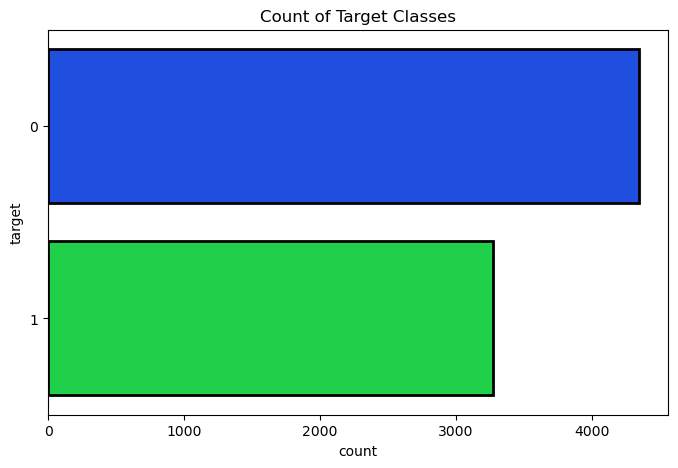

In [18]:
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.countplot(y=train["target"],linewidth=2,
                   edgecolor='black')

plt.show()

<h4>Inference:-</h4>

*From the Countplot, it can be observed that the total number of samples in Target Class 1 is around 3200 while in Target Class 0, it is about 4500. Also, the classes seems to be in balanced state.*

<h4>Let's start by analysing total number of characters in text.</h4>

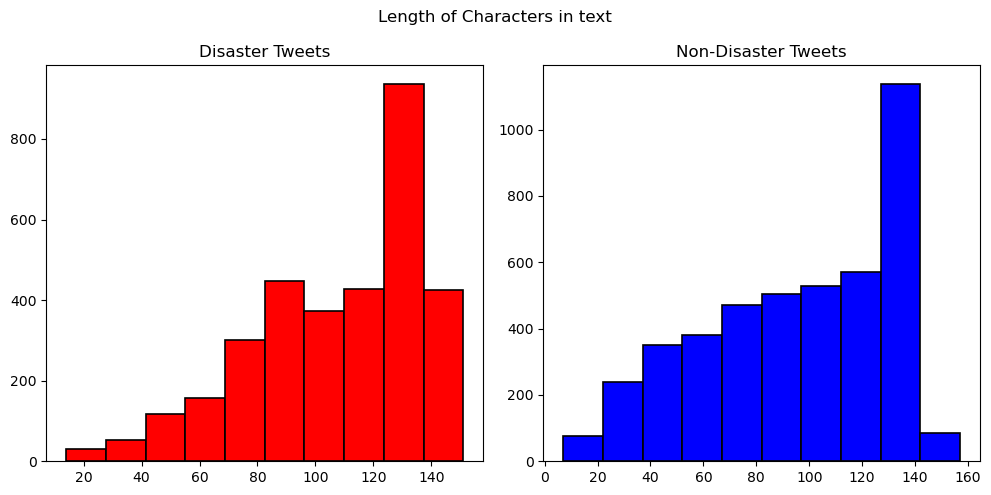

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()


<h4>Inference:-</h4>

*From the above histograms, it can be observed that the characters count for disaster and non-disaster tweets are in the range of (120,140).*

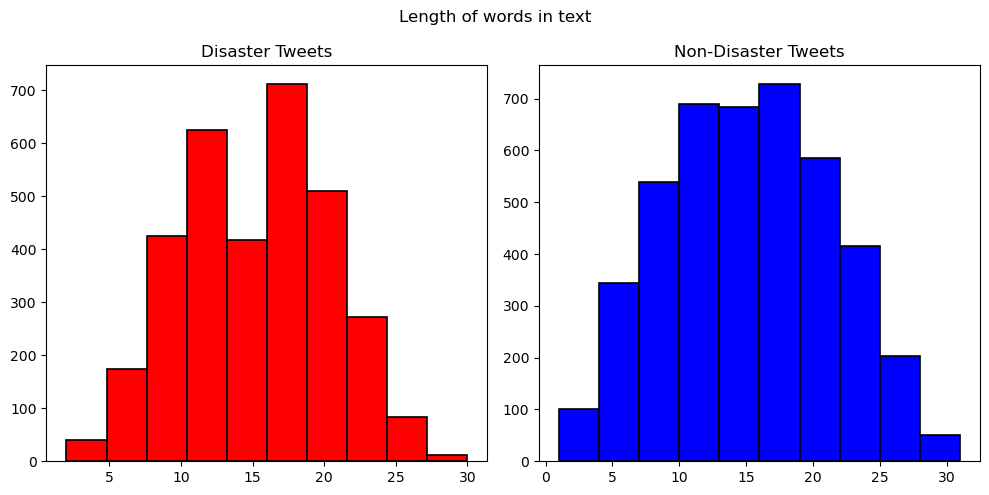

In [21]:
# Analysing number of words in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of words in text")
plt.tight_layout()
plt.show()

<h4>Inference:-</h4>


*From the above histograms, it can be observed that the words count for disaster and non-disaster tweets are in the range of (15-20).*

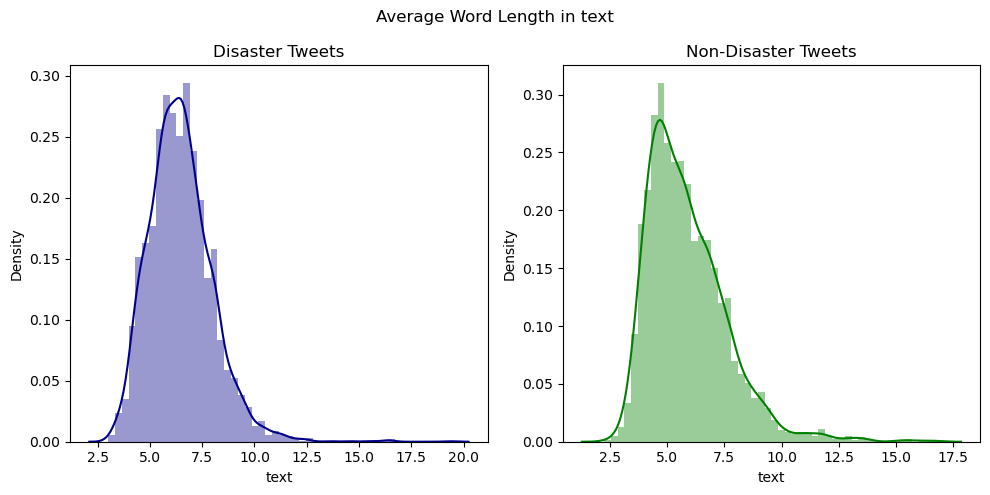

In [22]:
# Analysing average word length in text.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_dis.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Disaster Tweets')
char_len_ndis = train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(char_len_ndis.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Average Word Length in text")
plt.tight_layout()
plt.show()

<h4>Inference:-</h4>


*From the above distributions, it can be observed that the average word count for disaster tweets are found to be in the range(7-7.5) while for non-disaster tweets are in the range of (4.5-5).*

<h3>Let's explore the data further in depth:-</h3>

<h4>Below sections perform following analysis:</h4>

* Stop Words Analysis
* Punctuations Analysis
* Analysis of Missing words.

In [24]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
    

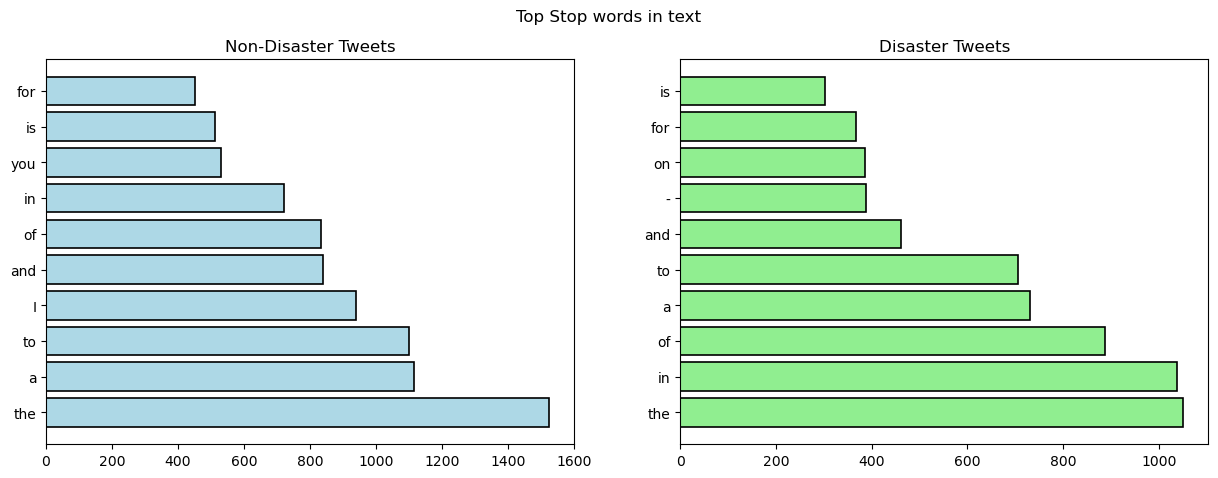

In [25]:
# Analysing top stop words in text.
from collections import defaultdict

def analyze_stopwords(data,func,target):
    values_list = []
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for word in corpus:
            dic[word]+=1
        top = sorted(dic.items(),key = lambda x: x[1],reverse=True)[:10]
        x_items,y_values = zip(*top)
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.barh(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.barh(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

analyze_stopwords(train,create_corpus,[0,1])

<h4>Inference:-</h4>

*The above Bar Charts displays the top 10 stop words in tweets. From the bar chart, it is observed that <strong>the most frequently</strong> occuring stopword in both disaster/non-disaster tweets is <strong>"the"(1000+)</strong> while <strong>the least occuring </strong>for non-disaster is <strong>"for"(400)</strong> and for disaster tweets is <strong>"is"(300)</strong>.*

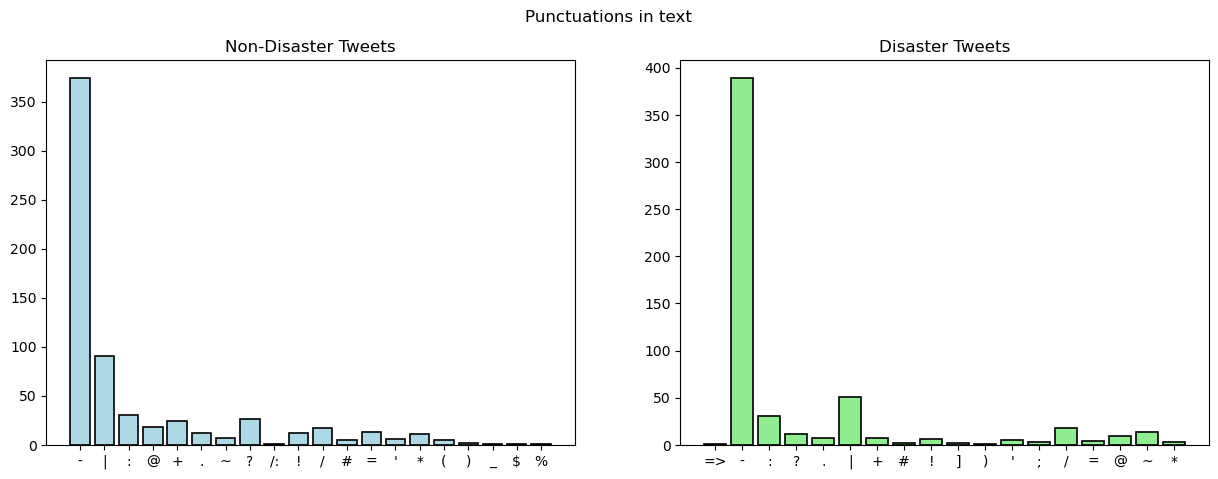

In [26]:
# Anaysing Punctuations
import string

def analyze_punctuation(data,func,target):
    values_list = []
    special = string.punctuation
    for labels in range(0,len(target)):
        dic = defaultdict(int)
        corpus = func(target[labels])
        for i in corpus:
            if i in special:
                dic[i]+=1
        x_items,y_values = zip(*dic.items())
        values_list.append(x_items)
        values_list.append(y_values)
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    ax1.bar(values_list[0],values_list[1],color="lightblue",edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.bar(values_list[2],values_list[3],color="lightgreen",edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Punctuations in text")
    plt.show()

analyze_punctuation(train,create_corpus,[0,1])

<h4>Inference:-</h4>

*The above Bar Charts displays the top 10 punctuations in tweets. From the bar chart, it is observed that <strong>the most </strong> occuring punctuation in both disaster/non-disaster tweets is <strong>"-"(350+)</strong> while <strong>the least occuring </strong>for non-disaster are <strong>"%","/:","$","_"</strong> and for disaster tweets is <strong>"=>", ")"</strong>.*

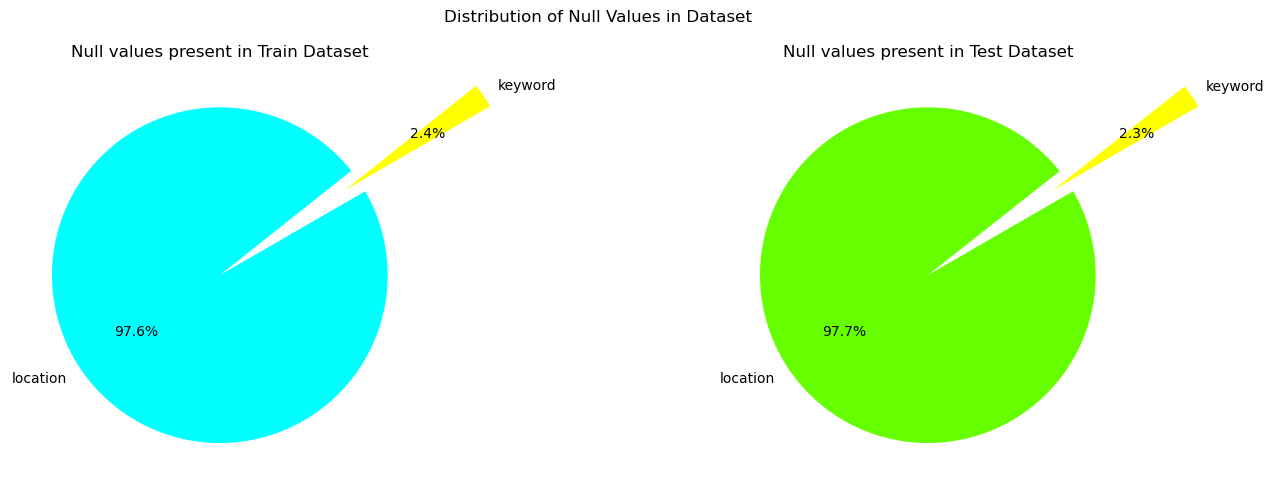

In [27]:
# Checking Null values
missing_train = train.isnull().sum()  
missing_test = test.isnull().sum()  
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
missing_train = missing_train[missing_train>0].sort_values()
ax1.pie(missing_train,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','cyan'])
ax1.set_title("Null values present in Train Dataset")

missing_test = missing_test[missing_test>0].sort_values()
ax2.pie(missing_test,autopct='%1.1f%%',startangle=30,explode=[0.9,0],labels=["keyword","location"],colors=['yellow','#66ff00'])
ax2.set_title("Null values present in Test Dataset")
plt.suptitle("Distribution of Null Values in Dataset")
plt.tight_layout()
plt.show()

<h4>Inference:-</h4>

*The above pictorial representation displays the missing values in dataset. From the distribution, it is observed that columns <strong>Keyword and Location</strong> contains  missing values. For training data, the % of missing values  are <strong>97.6 for "location" and 24 for "keywords"</strong> while for testing data, it is  <strong>97.7% for "location" and 23% for keywords</strong>. Also, the column having <strong>maximum missing values is: location</strong> while <strong>Keywords column has the minimum</strong> count of missing values for both sets of data.*

<h4>Let's  analyze the keywords column:-</h4>



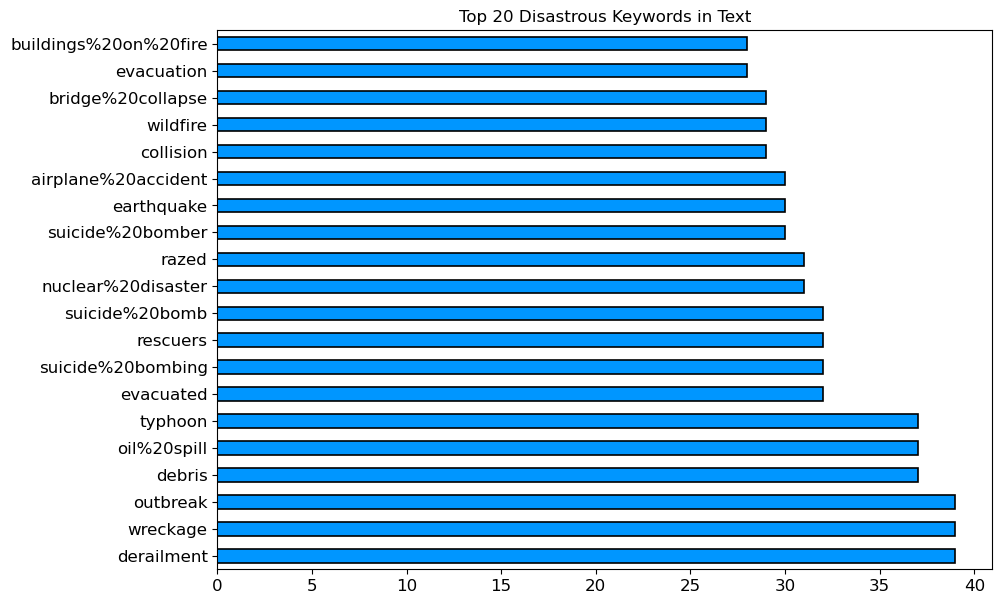

In [28]:
# Analysing Top 20  disastrous KeyWords in text .
plt.figure(figsize=(10,7))
train[train['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

<h4>Inference:-</h4>

*The above Bar Chart represents the top 20 disastrous keywords in text. From the bar chart, it is observed that <strong>the most </strong> occuring keywords are <strong>derailment,wreckage,outbreak (35+)</strong> while <strong>the least occuring </strong>are <strong>sandstorm and evacuation (28)</strong>.*

<h4>Let's analyze Locations column:-</h4>

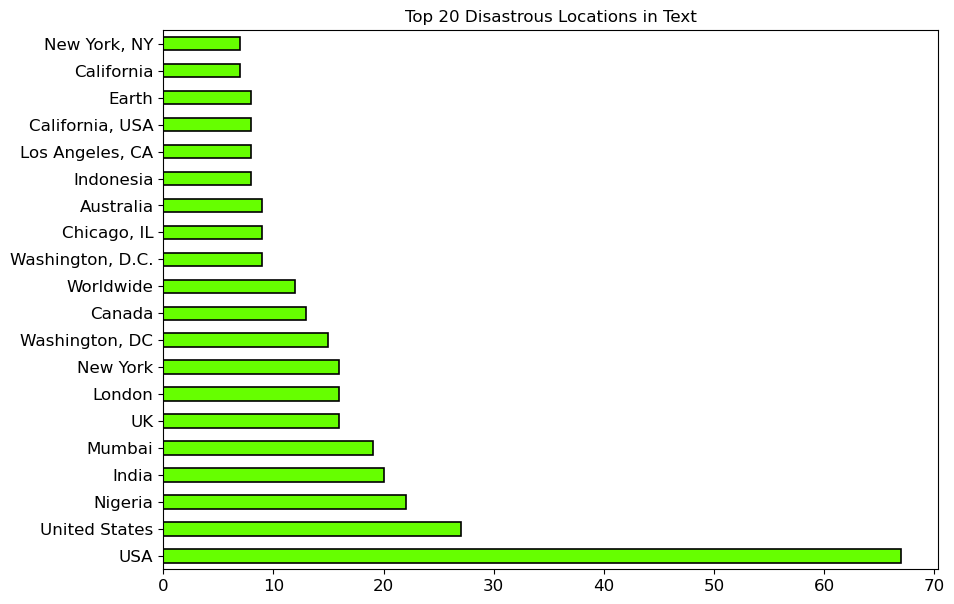

In [29]:
# Analysing Top 20 disastrous Locations in text.
plt.figure(figsize=(10,7))
train[train["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

<h4>Inference:-</h4>

*The above Bar Chart displays the top 20 Locations in tweets. From the chart, it is observed that <strong>the most </strong> occuring/referred location is <strong>USA/United States (68)</strong> while <strong>the least occuring </strong> are <strong>Los Angeles and California (5)</strong>.*

# Chapter 2: Removing the Garbage

<h4> Let's Clean the Data. Following operations are carried out on text column for performing Data Cleaning </h4>

* Removal of URL's.
* Removal of HTMl tags.
* Removal of Emoji's.
* Filtering out miscellaneous text.
* Lowering the text.
* Performing Stemming (in case of bag of words(bow) and tf-idf) and lemmatization for (LSTM).
* Discarding words of length < 2.


Note: The Stemming process is performed for bow and tf-idf because there is no need of meaningful words while lemmatization is performed for LSTM because we do require meaningful words (discussed in subsequent sections).


In [13]:
# Seperating independent and dependent features
X = train.drop(columns=["target"],axis=1)
y = train["target"]

In [14]:
# Perfoming data cleaning

messages_train = X.copy()
messages_test  = test.copy()

ps = PorterStemmer()
wl = WordNetLemmatizer()
def preprocess_data(data):
    '''
    Input: Data to be cleaned.
    Output: Cleaned Data.
    
    '''
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [ps.stem(words) for words in review if words not in stopwords.words('english')] #Stemming
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

train["Cleaned_text"] = train["text"].apply(preprocess_data)
test["Cleaned_text"] = test["text"].apply(preprocess_data)

<h4> Let's take a look at Cleaned Data </h4>

In [8]:
train.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


<h4> Let's analyze common words after cleaning of text using Word Cloud</h4>

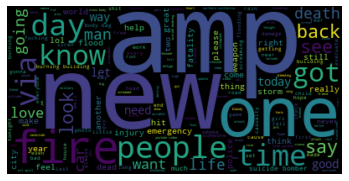

In [65]:
# Analysing common words using WordCloud 

wc = WordCloud(background_color='black')
wc.generate(' '.join(train['Cleaned_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

<h4>Inference:-</h4>

*The above displays top common words post the cleaning of text in training data. The most occuring words are: <strong>amp, new, one, people, time etc. </strong>.*

<h4>Let's further analyse top 50 words of disaster/non-disastrous in training data:-</h4>


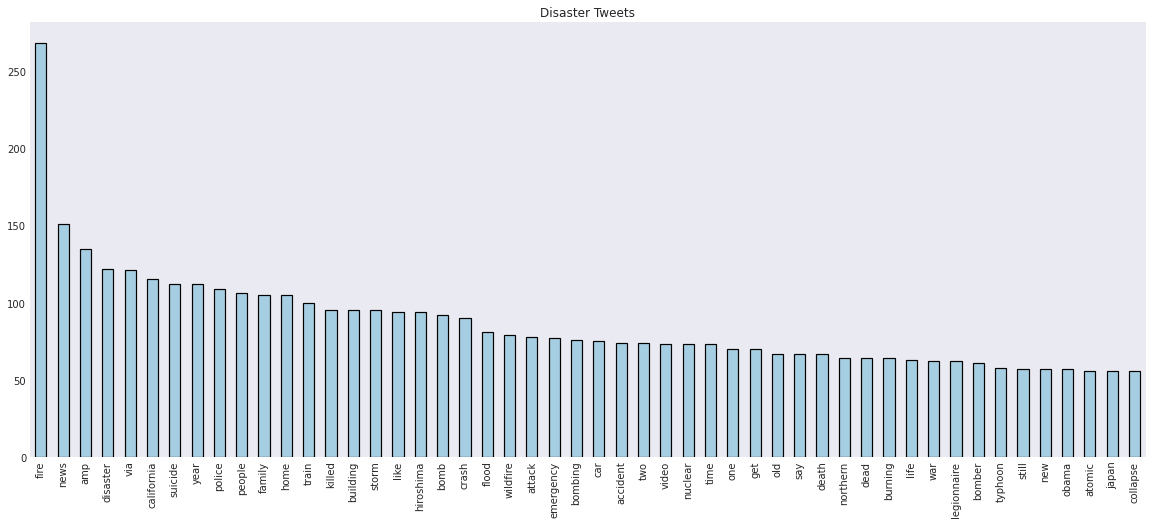

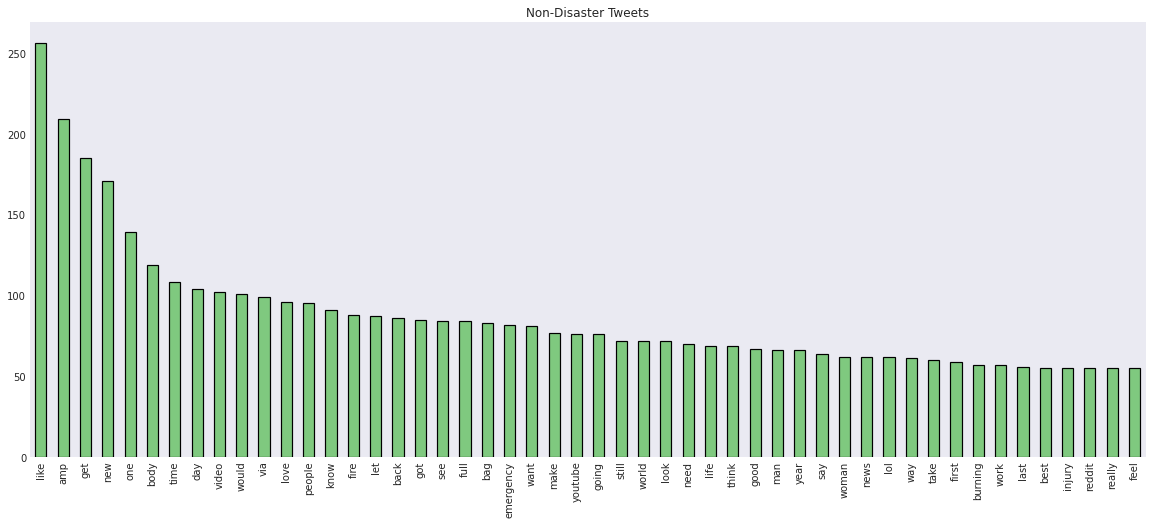

In [71]:
# Analysing top 50 words in training data

disaster_tweet = train[train.target==1]["Cleaned_text"]
non_disaster_tweet = train[train.target==0]["Cleaned_text"]

color = ['Paired','Accent']
splitedData = [disaster_tweet,non_disaster_tweet]
title = ["Disaster Tweets", "Non-Disaster Tweets"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(50).plot(kind='bar',fontsize=10,colormap=color[item],edgecolor='black', linewidth=1.2)
    plt.show()

<h4>Inference:-</h4>

*The above Bar Charts displays the top 50 Words post cleaning in text. From the chart, it is observed that <strong>the most </strong> occuring word for disaster tweets is: <strong> fire (250+)</strong> and for non-disaster is :<strong> like (250+) </strong>while <strong>the least occuring </strong> are <strong> collapse, atomic (80)</strong> for disaster and <strong> feel, really etc. (80) </strong> for non-disastrous.*

<strong> From above chart, it appears that our cleaned text still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model, resulting in false prediction. Now, we will further remove some confusing words from text based on above charts.</strong>

In [15]:
common_words = ['via','like','build','get','would','one','two','feel','lol','fuck','take','way','may','first','latest'
                'want','make','back','see','know','let','look','come','got','still','say','think','great','pleas','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

train["Cleaned_text"] = train["Cleaned_text"].apply(text_cleaning)
test["Cleaned_text"] = test["Cleaned_text"].apply(text_cleaning)

<strong> Let's check one example whether there are any change occured or not</strong>

In [11]:
train.head(1) # Much more cleaner

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak allah forgiv
